# AIC-102 Machine Learning 1: ETL
## ETL Project for Rocket Elevator Data

### Author: Gavriel Rudolph  
### Course: AIC-102 Machine Learning 1: ETL  
### Date: January 24, 2025  


## Table of Contents

1. [Introduction](#1-introduction)
2. [Setup and Data Loading](#2-setup-and-data-loading)  
   2.1. [Importing Libraries](#21-importing-libraries)  
   2.2. [Verifying and Loading Data](#22-verifying-and-loading-data)  
   2.3. [Previewing the Data](#23-previewing-the-data)  
3. [Data Exploration](#3-data-exploration)  
   3.1. [Checking for Missing Values](#31-checking-for-missing-values)  
   3.2. [Descriptive Statistics](#32-descriptive-statistics)  
   3.3. [Visualizing Missing Data](#33-visualizing-missing-data)  
4. [Analysis of the License Dataset (license.csv)](#4-analysis-of-the-license-dataset-licensecsv)  
   4.1. [1a. Distinguishing Each Elevator](#41-1a-distinguishing-each-elevator)  
   4.2. [1b. Location Analysis](#42-1b-location-analysis)  
   4.3. [1c. Filtering "LICENSE STATUS"](#43-1c-filtering-license-status)  
   4.4. [1d. Verifying Uniqueness](#44-1d-verifying-uniqueness)  
   4.5. [1e. Time Series Plot of License Expiry](#45-1e-time-series-plot-of-license-expiry)  
   4.6. [1f. Table of Expirations by Year-Month](#46-1f-table-of-expirations-by-year-month)  
5. [Next Steps](#5-next-steps)  
6. [Conclusion](#6-conclusion)  








# 1. Introduction

Welcome to our **ETL Project for Rocket Elevator Data**! In this notebook, we'll work through **Extract, Transform, and Load** steps for several datasets relating to elevator operations in Ontario, Canada. Our goal is to clean, filter, and gain initial insights from this data, setting the stage for subsequent machine learning tasks.


# 2. Setup and Data Loading
In this section, we outline our environment setup and load our primary datasets into pandas DataFrames.

## 2.1. Importing Libraries


In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configure plots for a better look
sns.set(style="whitegrid")
%matplotlib inline

## 2.2. Verifying and Loading Data
We check if our data files are present, then load them into DataFrames.


In [125]:
# Listing files in the current directory to verify data availability
print("Files in the current directory:")
print(os.listdir('.'))


Files in the current directory:
['.gitkeep', 'licence-ETL.ipynb', 'inspections-ETL.ipynb', 'incident-exploration.ipynb', '.ipynb_checkpoints', 'installed-ETL.ipynb', 'altered-ETL.ipynb']


>Here, we use pandas to load the data from each of the files into a dataframe variable. 

In [126]:
# Define the path to the data directory
data_path = '../data/raw/'

# List of expected data files
expected_files = ['license.csv', 'inspection.csv', 'installed.json', 'altered.json']

print("Verifying data files in the directory:")
try:
    available_files = os.listdir(data_path)
    print(f"Files found in '{data_path}':", available_files)
    
    # Check for missing files
    missing_files = [f for f in expected_files if f not in available_files]
    if missing_files:
        print(f"\nMissing files: {missing_files}")
    else:
        print("\nAll expected data files are present.")
        
    # Load CSV data
    license_df = pd.read_csv(os.path.join(data_path, 'license.csv'))
    inspection_df = pd.read_csv(os.path.join(data_path, 'inspection.csv'))
    
    # Load JSON data
    installed_df = pd.read_json(os.path.join(data_path, 'installed.json'))
    altered_df   = pd.read_json(os.path.join(data_path, 'altered.json'))

    print("\nData files loaded successfully.")
    
except FileNotFoundError as e:
    print(f"Error: {e}\nPlease ensure all data files are present in the '{data_path}' directory.")
except pd.errors.EmptyDataError as e:
    print(f"Error: {e}\nOne of the files is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Verifying data files in the directory:
Files found in '../data/raw/': ['installed.json', 'cleaned_license_data.csv', '.gitkeep', 'order.csv', 'merged_installed_data.csv', 'license.csv', 'inspection.csv', 'merged_altered_data.csv', 'altered.json', 'incident.json']

All expected data files are present.
Error: No columns to parse from file
One of the files is empty.


## 2.3. Previewing the Data
It's good practice to look at the first few rows of each dataset to understand our starting point.


In [127]:
# Displaying the first few rows of each dataset
print("Preview of License Data:")
display(license_df.head())

print("\nPreview of Installed Data:")
display(installed_df.head())

print("\nPreview of Altered Data:")
display(altered_df.head())

print("\nPreview of Inspection Data:")
display(inspection_df.head())


Preview of License Data:


,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,28-Apr-17,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted
1,100,1804 HIGHWAY 2 E BROCKVILLE K6V 5T1 ON CA,170719,BY REQUEST,12-Dec-14,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,333 PRESTON ST 7TH FLR PRESTON SQUARE TOWER 1 ...,data redacted
2,10047,162 PEMBROKE ST W PEMBROKE K8A 5M8 ON CA,EDLIC-010047,BY REQUEST,15-Mar-08,PROFAC MANAGEMENT GROUP LTD,data redacted,304 THE EAST MALL P.O. # 653058-Y3-20610 TORON...,PROFAC MANAGEMENT GROUP LTD,304 THE EAST MALL P.O. # 653058-Y3-20610 TORON...,data redacted
3,10054,541 SUSSEX DR OTTAWA K1N 6Z6 ON CA,EDLIC-010054,BY REQUEST,01-Oct-05,DEPARTMENT OF PUBLIC WORKS & GOVERNMENT SERVIC...,data redacted,4900 YONGE ST 11TH FLOOR TORONTO ON M2N 6A6 CA,DEPARTMENT OF PUBLIC WORKS & GOVERNMENT SERVIC...,"4900 YONGE ST 11TH FLOOR TORONTO, ON, M2N 6A6, CA",data redacted
4,1009,404 MAIN ST WOODSTOCK N4S 7X5 ON CA,EDLIC-001009,ACTIVE,15-Jul-17,AGRIBRANDS PURINA CANADA INC,data redacted,404 MAIN ST PO BOX 250 WOODSTOCK ON N4S 7X5 CA,AGRIBRANDS PURINA CANADA INC,"404 MAIN ST PO BOX 250 WOODSTOCK, ON, N4S 7X5, CA",data redacted



Preview of Installed Data:


,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
0,8,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
1,9,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
2,10,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
3,11,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
4,13,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N



Preview of Altered Data:


,originating service request number,Alteration Customer,Summary,Elevating Devices Number,Inspection number,Alteration Location,Alteration Type,Status of Alteration Request,Alteration contractor name,Billing Customer
0,782682,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Minor B Alteration Machine Guarding,8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor B Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
1,834770,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,"Car top Railing, 12-2191A/05",8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor A Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
2,1357738,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Major Alteration 6028233 Car 4,8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Major Alteration,Passed,NaN,KONE INC - TORONTO SEB
3,834774,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,"Car top Railing, 12-2191A/05",9,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor A Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
4,782688,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Minor B Alteration Machine Guarding,9,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor B Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD



Preview of Inspection Data:


,originatingservicerequestnumber,InspectionCustomer,ElevatingDevicesNumber,InspectionNumber,InspectionLocation,InspectionType,Earliest_INSPECTION_Date,Latest_INSPECTION_Date,InspectionOutcome
0,55620,LANDSCAPE COURT APARTMENTS LTD,9948,3157237,10 WYCOMBE RD DOWNSVIEW M3M 2W7 ON CA,ED-Followup Inspection,1/10/2011,1/10/2011,Passed
1,357196,YORK CONDO CORP #255,28588,2823870,75 EMMETT AV TORONTO M6M 5A7 ON CA,ED-Periodic Inspection,1/10/2011,1/10/2011,Follow up
2,102922,BMCC REIT,76833,3158421,5099 CREEKBANK RD MISSISSAUGA L4W 1R3 ON CA,ED-Followup Inspection,1/10/2011,1/10/2011,Passed
3,357352,YORK CONDO CORP #255,28590,2823948,75 EMMETT AV TORONTO M6M 5A7 ON CA,ED-Periodic Inspection,1/10/2011,1/10/2011,Follow up
4,516054,YORK CONDO CORP #255,28589,3193568,75 EMMETT AV TORONTO M6M 5A7 ON CA,ED-Periodic Inspection,1/10/2011,1/10/2011,Follow up


# 3. Data Exploration
Here, we explore our data to identify missing values, gather basic statistics, and see if any immediate cleaning tasks stand out.


## 3.1. Checking for Missing Values

In [128]:
print("Missing values in 'license_df':")
print(license_df.isnull().sum())

print("\nMissing values in 'installed_df':")
print(installed_df.isnull().sum())

print("\nMissing values in 'altered_df':")
print(altered_df.isnull().sum())

print("\nMissing values in 'inspection_df':")
print(inspection_df.isnull().sum())

Missing values in 'license_df':
ElevatingDevicesNumber            0
LocationoftheElevatingDevice     43
ElevatingDevicesLicenseNumber     0
LICENSESTATUS                     0
LICENSEEXPIRYDATE                 0
LICENSEHOLDER                     0
LICENSEHOLDERACCOUNTNUMBER        0
LICENSEHOLDERADDRESS              0
BILLINGCUSTOMER                   0
BILLINGADDRESS                    0
BILLINGACCOUNT                    0
dtype: int64

Missing values in 'installed_df':
Elevating devices number     0
Owner Name                   0
Owner Address                0
Owner Account Number         0
Device Class                 0
Device Type                  0
DeviceStatus                 0
Location of Device          48
under review                 0
dtype: int64

Missing values in 'altered_df':
originating service request number        0
Alteration Customer                       0
Summary                                   0
Elevating Devices Number                  0
Inspection number      

## 3.2. Descriptive Statistics


In [129]:
print("Descriptive statistics for 'license_df':")
display(license_df.describe(include='all'))

print("\nDescriptive statistics for 'installed_df':")
display(installed_df.describe(include='all'))

print("\nDescriptive statistics for 'altered_df':")
display(altered_df.describe(include='all'))

print("\nDescriptive statistics for 'inspection_df':")
display(inspection_df.describe(include='all'))

Descriptive statistics for 'license_df':


,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
count,4.538300e+04,45340,45383,45383,45383,45383,45383,45383,45383,45383,45383
unique,NaN,23442,45383,11,1118,16363,1,13276,16311,12581,1
top,NaN,3401 DUFFERIN ST TORONTO M6A 2T9 ON CA,EDLIC-000010,ACTIVE,15-Apr-17,TORONTO COMMUNITY HOUSING CORPORATION,data redacted,35 CARL HALL RD SUITE 4 TORONTO ON M3K 2B6 CA,TORONTO COMMUNITY HOUSING CORPORATION,"35 CARL HALL RD SUITE 4 TORONTO, ON, M3K 2B6, CA",data redacted
freq,NaN,57,1,42665,2182,575,45383,576,575,576,45383
mean,9.957448e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.326861e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.314550e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.199100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.192050e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Descriptive statistics for 'installed_df':


,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
count,4.693600e+04,46936,46936,46936,46936,46936,46936,46888,46936
unique,NaN,16586,13339,1,1,11,5,24028,2
top,NaN,TORONTO COMMUNITY HOUSING CORPORATION,35 CARL HALL RD SUITE 4 TORONTO ON M3K 2B6 CA,redacted,Elevators,Passenger Elevator,Active,TERMINAL 3 COMPLEX TORONTO L5P 1B2 ON CA,N
freq,NaN,576,576,46936,46936,42405,44731,61,46920
mean,9.972200e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.328375e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.291175e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.194850e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.178550e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Descriptive statistics for 'altered_df':


,originating service request number,Alteration Customer,Summary,Elevating Devices Number,Inspection number,Alteration Location,Alteration Type,Status of Alteration Request,Alteration contractor name,Billing Customer
count,3.161900e+04,31619,31619,3.161900e+04,0.0,31596,31619,31619,0.0,31618
unique,NaN,7430,22511,NaN,NaN,10510,3,12,NaN,221
top,NaN,TORONTO COMMUNITY HOUSING CORPORATION,MinB Cab Mod,NaN,NaN,40 KING ST W TORONTO M5H 3Y2 ON CA,ED-Minor A Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD
freq,NaN,830,1260,NaN,NaN,100,15656,26844,NaN,2432
mean,1.329224e+06,NaN,NaN,1.536320e+06,NaN,NaN,NaN,NaN,NaN,NaN
std,4.369521e+05,NaN,NaN,9.715026e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,5.086220e+05,NaN,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.895420e+05,NaN,NaN,1.999050e+04,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.412936e+06,NaN,NaN,3.148100e+04,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.704763e+06,NaN,NaN,6.416350e+04,NaN,NaN,NaN,NaN,NaN,NaN



Descriptive statistics for 'inspection_df':


,originatingservicerequestnumber,InspectionCustomer,ElevatingDevicesNumber,InspectionNumber,InspectionLocation,InspectionType,Earliest_INSPECTION_Date,Latest_INSPECTION_Date,InspectionOutcome
count,143181,143181,1.431810e+05,1.431810e+05,143068,143181,143181,143181,143181
unique,91185,16423,NaN,NaN,21032,29,1040,1081,34
top,1390904,TORONTO COMMUNITY HOUSING CORPORATION,NaN,NaN,1053 CARLING AVE OTTAWA K1Y 4E9 ON CA,ED-Followup Inspection,1/6/2016,1/6/2016,Follow up
freq,11,2484,NaN,NaN,288,55730,346,345,54605
mean,NaN,NaN,7.756137e+06,4.681480e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.092914e+07,1.063588e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,8.000000e+00,2.693500e+04,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.237700e+04,3.801222e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.920200e+04,4.754808e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,7.819000e+04,5.427340e+06,NaN,NaN,NaN,NaN,NaN


## 3.3. Visualizing Missing Data
A missingno matrix can help us spot patterns in missing data.


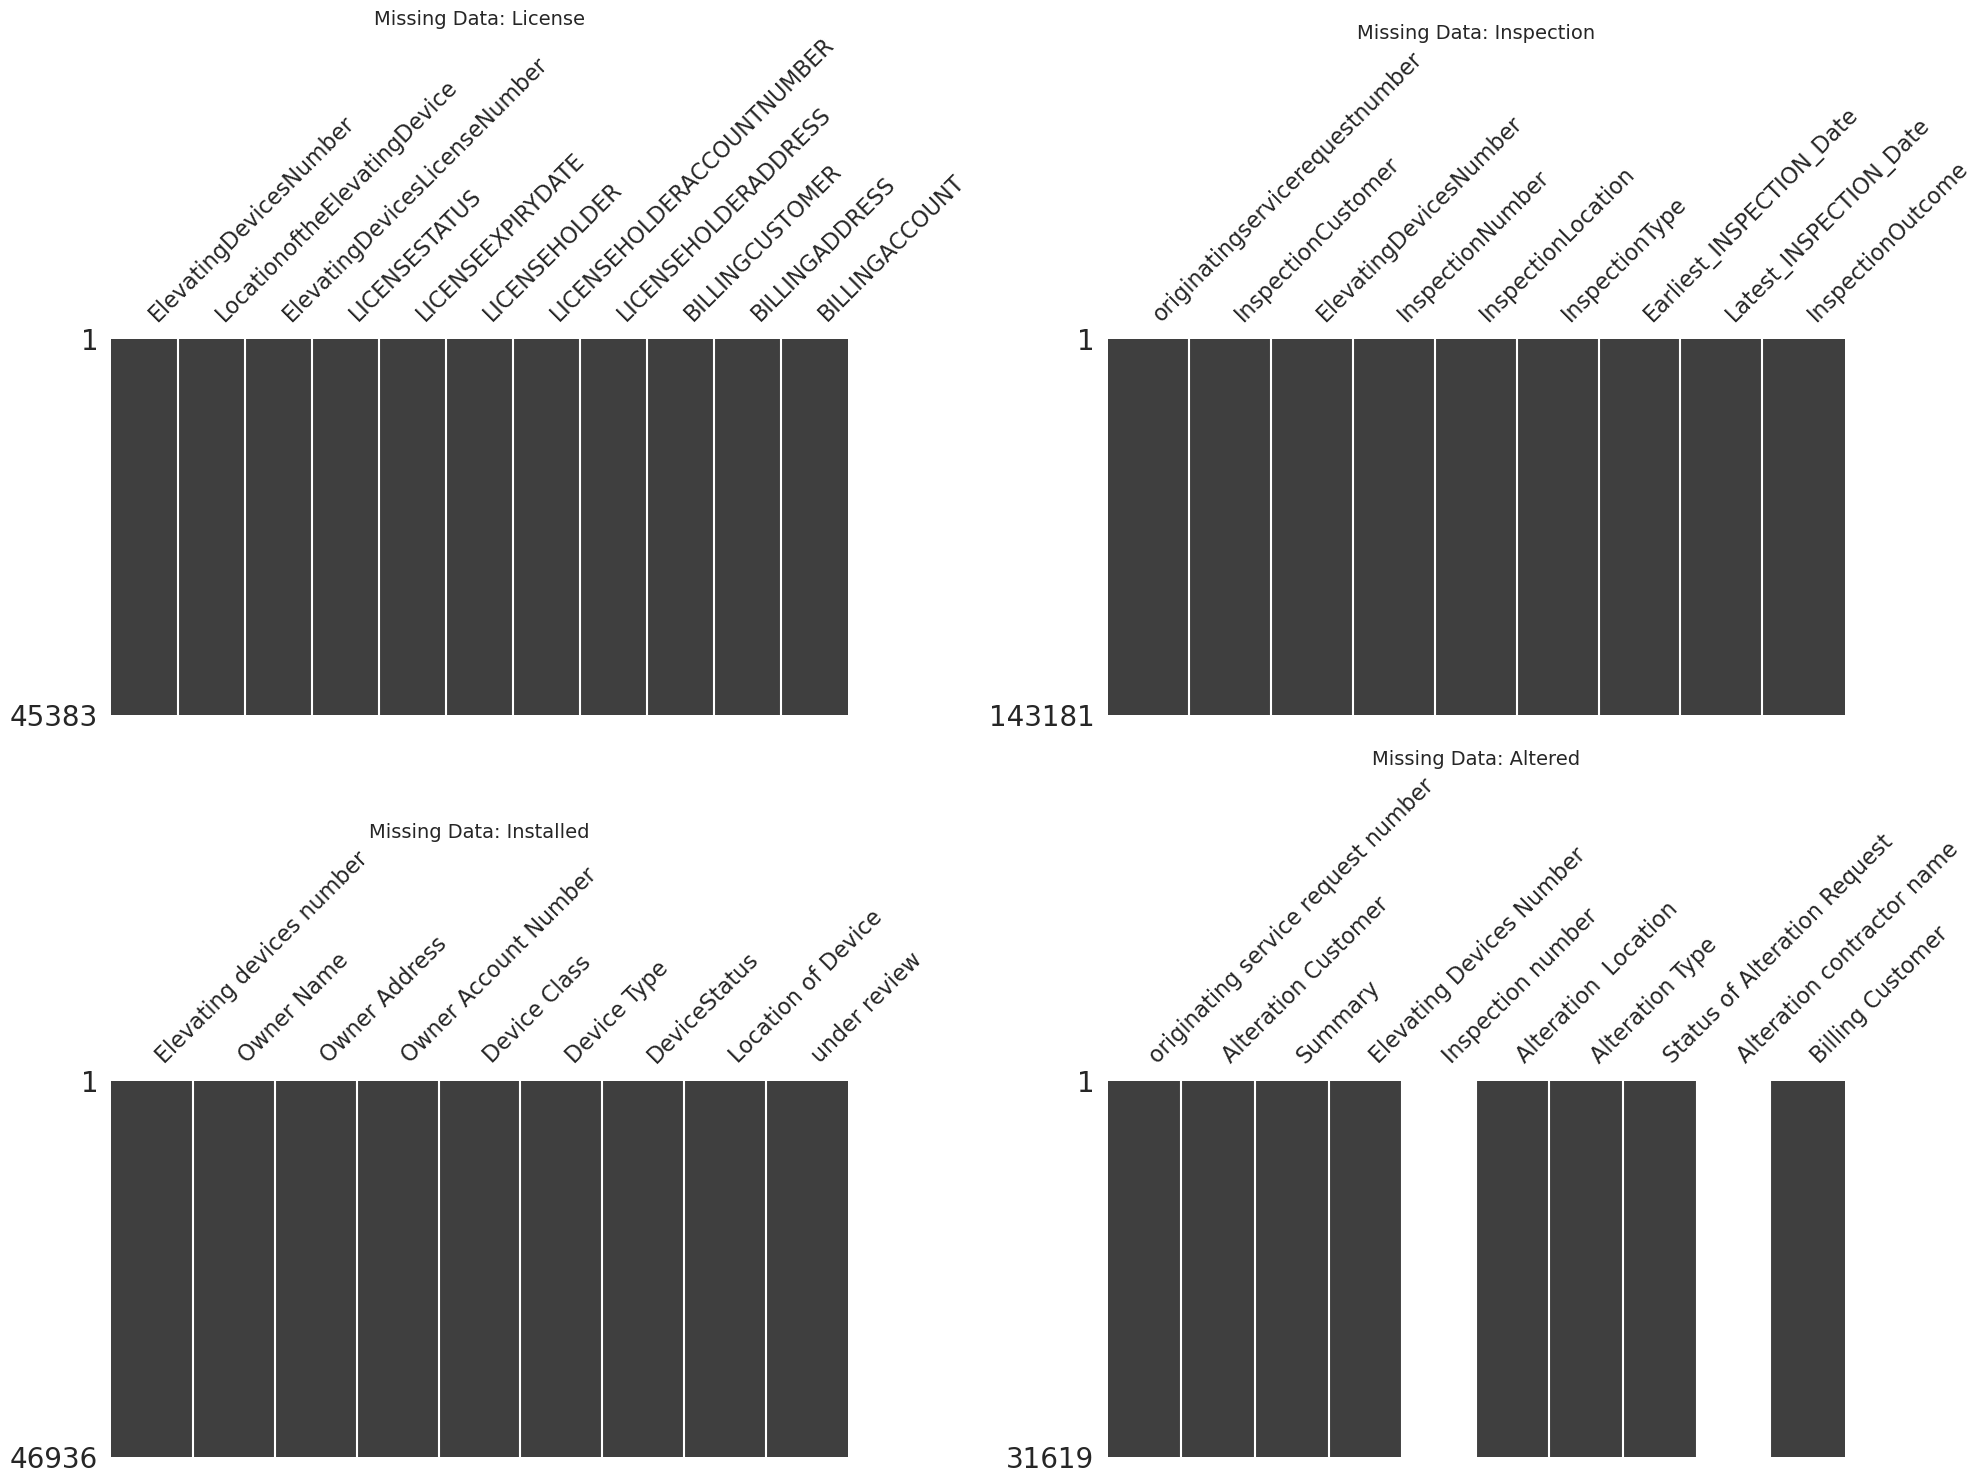

In [130]:
def visualize_missing_data_grid(dfs, df_names, rows=2, cols=2, figsize=(20, 15)):
    """
    Visualizes missing data for multiple dataframes in a grid layout.
    """
    if len(dfs) != len(df_names):
        print("Mismatched DataFrame/Name count.")
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for idx, (df, name) in enumerate(zip(dfs, df_names)):
        if idx >= rows * cols:
            break
        msno.matrix(df, ax=axes[idx], sparkline=False)
        axes[idx].set_title(f"Missing Data: {name}", fontsize=14)

    # Hide any unused subplots
    for j in range(idx + 1, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

dataframes = [license_df, inspection_df, installed_df, altered_df]
df_names  = ['License', 'Inspection', 'Installed', 'Altered']

visualize_missing_data_grid(dataframes, df_names, rows=2, cols=2, figsize=(20, 15))

# 4. Analysis of the License Dataset (`license.csv`)

## **1a. Distinguishing Each Elevator**

**Objective:** Identify a unique variable to distinguish each elevator across datasets.

**Approach:**

-   Identify potential unique identifier columns, such as `ElevatingDevicesNumber` or `ElevatingDevicesLicenseNumber`.
-   Verify the uniqueness and consistency of the chosen column across all relevant datasets using code-based methods.

### 4.1.1. Inspecting Columns

First, we examine the columns present in the `license.csv` and other related datasets (`inspection.csv`, `installed.json`, and `altered.json`) to identify potential candidate variables for uniquely identifying each elevator.

In [196]:
# Inspect columns in all datasets
datasets = {
    "license_df": license_df,
    "inspection_df": inspection_df,
    "installed_df": installed_df,
    "altered_df": altered_df
}

print("Inspecting column names in all datasets...\n")
for name, df in datasets.items():
    print(f"Columns in {name}:")
    print(df.columns.tolist())
    print()

Inspecting column names in all datasets...

Columns in license_df:
['ElevatingDevicesNumber', 'LocationoftheElevatingDevice', 'ElevatingDevicesLicenseNumber', 'LICENSESTATUS', 'LICENSEEXPIRYDATE', 'LICENSEHOLDER', 'LICENSEHOLDERACCOUNTNUMBER', 'LICENSEHOLDERADDRESS', 'BILLINGCUSTOMER', 'BILLINGADDRESS', 'BILLINGACCOUNT', 'State_Province', 'Country', 'Expiry_YearMonth']

Columns in inspection_df:
['originatingservicerequestnumber', 'InspectionCustomer', 'ElevatingDevicesNumber', 'InspectionNumber', 'InspectionLocation', 'InspectionType', 'Earliest_INSPECTION_Date', 'Latest_INSPECTION_Date', 'InspectionOutcome']

Columns in installed_df:
['ElevatingDevicesNumber', 'Owner Name', 'Owner Address', 'Owner Account Number', 'Device Class', 'Device Type', 'DeviceStatus', 'InstalledLocation', 'under review']

Columns in altered_df:
['originating service request number', 'Alteration Customer', 'Summary', 'ElevatingDevicesNumber', 'Inspection number', 'AlterationLocation', 'Alteration Type', 'Stat

### 4.1.2. Standardizing Column Names

To ensure consistency in column naming across all datasets, we standardize column names where necessary. This reduces potential issues caused by variations in naming conventions.

**Rationale:** Consistent column names facilitate accurate merging and analysis across multiple datasets.

In [197]:
# Define a function to standardize column names
def standardize_column_names(df, column_mappings):
    """
    Renames the columns of a dataframe based on the provided mapping.

    Parameters:
    - df (pd.DataFrame): The dataframe whose columns need to be renamed.
    - column_mappings (dict): A dictionary mapping old column names to new column names.
    """
    df.rename(columns=column_mappings, inplace=True)

# Define the column mappings for each dataset
license_column_mappings = {
    'Elevating devices number': 'ElevatingDevicesNumber',
    'Elevating Devices Number': 'ElevatingDevicesNumber',
    'ElevatingDevicesNumber': 'ElevatingDevicesNumber' 
}

inspection_column_mappings = {
    'Elevating devices number': 'ElevatingDevicesNumber',
    'Elevating Devices Number': 'ElevatingDevicesNumber',
    'ElevatingDevicesNumber': 'ElevatingDevicesNumber'
}

installed_column_mappings = {
    'Elevating devices number': 'ElevatingDevicesNumber',
    'Location of Device': 'InstalledLocation' 
}

altered_column_mappings = {
    'Elevating Devices Number': 'ElevatingDevicesNumber',
    'Elevating devices number': 'ElevatingDevicesNumber',
    'Alteration  Location': 'AlterationLocation'  
}

# Apply standardization
standardize_column_names(license_df, license_column_mappings)
standardize_column_names(inspection_df, inspection_column_mappings)
standardize_column_names(installed_df, installed_column_mappings)
standardize_column_names(altered_df, altered_column_mappings)

# Inspect column names in installed_df after standardization
print("Columns in installed_df after standardization:")
print('Installed Data Frame: ', installed_df.columns.tolist())
print('License Data Frame: ', license_df.columns.tolist())
print('Altered Data Frame: ', altered_df.columns.tolist())
print('Inspection Data Frame: ', inspection_df.columns.tolist())



Columns in installed_df after standardization:
Installed Data Frame:  ['ElevatingDevicesNumber', 'Owner Name', 'Owner Address', 'Owner Account Number', 'Device Class', 'Device Type', 'DeviceStatus', 'InstalledLocation', 'under review']
License Data Frame:  ['ElevatingDevicesNumber', 'LocationoftheElevatingDevice', 'ElevatingDevicesLicenseNumber', 'LICENSESTATUS', 'LICENSEEXPIRYDATE', 'LICENSEHOLDER', 'LICENSEHOLDERACCOUNTNUMBER', 'LICENSEHOLDERADDRESS', 'BILLINGCUSTOMER', 'BILLINGADDRESS', 'BILLINGACCOUNT', 'State_Province', 'Country', 'Expiry_YearMonth']
Altered Data Frame:  ['originating service request number', 'Alteration Customer', 'Summary', 'ElevatingDevicesNumber', 'Inspection number', 'AlterationLocation', 'Alteration Type', 'Status of Alteration Request', 'Alteration contractor name', 'Billing Customer']
Inspection Data Frame:  ['originatingservicerequestnumber', 'InspectionCustomer', 'ElevatingDevicesNumber', 'InspectionNumber', 'InspectionLocation', 'InspectionType', 'Earli

### 4.1.4. Verifying Uniqueness of the Identifier in Each Dataset

To determine if `ElevatingDevicesNumber` can uniquely identify records, we check for uniqueness in each dataset.

In [198]:
# Check if 'ElevatingDevicesNumber' is present in all datasets
common_identifier = 'ElevatingDevicesNumber'
datasets = [license_df, inspection_df, installed_df, altered_df]
dataset_names = ['license_df', 'inspection_df', 'installed_df', 'altered_df']

for name, df in zip(dataset_names, datasets):
    if common_identifier in df.columns:
        print(f"'{common_identifier}' is present in {name}.")
    else:
        print(f"'{common_identifier}' is not present in {name}.")

'ElevatingDevicesNumber' is present in license_df.
'ElevatingDevicesNumber' is present in inspection_df.
'ElevatingDevicesNumber' is present in installed_df.
'ElevatingDevicesNumber' is present in altered_df.


**Interpretation:**

-   `ElevatingDevicesNumber` is **unique** in `license_df` and `installed_df`, indicating each elevator has a single license and installation record.
-   It is **not unique** in `inspection_df` and `altered_df`, suggesting multiple inspections or alterations can occur for the same elevator, which is logically reasonable and expected.


### 4.1.5. Checking for Correspondence Across Datasets

We verify if `ElevatingDevicesNumber` corresponds to the same elevators across datasets by identifying common device numbers.

In [199]:
# Check if the device numbers correspond across datasets
common_device_numbers = set(license_df[common_identifier])
for df in datasets[1:]:
    common_device_numbers &= set(df[common_identifier])

if len(common_device_numbers) > 0:
    print(f"Common device numbers found across all datasets: {len(common_device_numbers)}")
else:
    print("No common device numbers found across all datasets.")


Common device numbers found across all datasets: 21030


**Interpretation:** There are **21,527** elevators present across all datasets, indicating a substantial overlap and enabling comprehensive analysis.

### 4.1.6. Checking Consistency of Related Attributes

Finally, we check if location attributes corresponding to `ElevatingDevicesNumber` are consistent across datasets.

**Purpose:** Verify that location attributes corresponding to `ElevatingDevicesNumber` are consistent across datasets to ensure accurate data merging and analysis.

**Rationale:** Consistent location data ensures accurate merging and analysis, reducing potential errors due to mismatched information.


In [200]:
# Define location-type columns corresponding to each dataset
# Note: 'Location of Device' in installed_df has been renamed to 'InstalledLocation' in the standardization step
location_columns = [
    'LocationoftheElevatingDevice',  # license_df
    'InspectionLocation',            # inspection_df
    'InstalledLocation',             # installed_df (after renaming)
    'AlterationLocation'             # altered_df
]


### 4.1.7. Define the Consistency Check Function

We define a function to check if the location columns are consistent across datasets based on the common identifier.


In [201]:
# Define a function to check consistency of location attributes
def check_location_consistency(dfs, common_identifier, location_columns):
    """
    Checks if the location columns are consistent across datasets based on the common identifier.

    Parameters:
    - dfs (list of pd.DataFrame): List of dataframes to check.
    - common_identifier (str): The column used as the unique identifier.
    - location_columns (list of str): Location columns corresponding to each dataframe.

    Returns:
    - pd.DataFrame: Merged dataframe with consistency check results.
    """
    # Start with the first dataframe's identifier and location
    merged_df = dfs[0][[common_identifier, location_columns[0]]].copy()
    
    # Iteratively merge with the remaining dataframes
    for df, loc_col in zip(dfs[1:], location_columns[1:]):
        # Ensure the location column exists before merging
        if loc_col in df.columns:
            merged_df = merged_df.merge(df[[common_identifier, loc_col]], on=common_identifier, how="inner")
        else:
            print(f"Warning: '{loc_col}' not found in one of the datasets. Skipping this column.")
    
    # Check if the location columns are consistent (case-insensitive and stripped)
    for loc_col in location_columns[1:]:
        if loc_col in merged_df.columns:
            merged_df[f"location_match_{loc_col}"] = merged_df[location_columns[0]].str.lower().str.strip() == merged_df[loc_col].str.lower().str.strip()
        else:
            merged_df[f"location_match_{loc_col}"] = False  # Assign False if the column was skipped
    
    return merged_df


### 4.1.8. Performing the Consistency Check



In [202]:
# Perform the consistency check
merged_df = check_location_consistency(
    [license_df, inspection_df, installed_df, altered_df], 
    common_identifier, 
    location_columns
)

# Check consistency results
for loc_col in location_columns[1:]:
    match_column = f"location_match_{loc_col}"
    if match_column in merged_df.columns:
        match_count = merged_df[match_column].sum()
        total_count = len(merged_df)
        print(f"Consistency check for {location_columns[0]} and {loc_col}: {match_count}/{total_count} matches")
    else:
        print(f"Consistency check for {location_columns[0]} and {loc_col}: Column missing, unable to perform check.")


Consistency check for LocationoftheElevatingDevice and InspectionLocation: 137793/138011 matches
Consistency check for LocationoftheElevatingDevice and InstalledLocation: 137781/138011 matches
Consistency check for LocationoftheElevatingDevice and AlterationLocation: 137800/138011 matches


### 4.1.9. Implementing Data Cleaning 


Given the presence of mismatched location data, we need to address these discrepancies to ensure data integrity.


In [203]:
import re

# Define a function to clean location data
def clean_location_data(df, location_columns):
    """
    Cleans location data by normalizing case, removing extra spaces, and standardizing abbreviations.

    Parameters:
    - df (pd.DataFrame): The dataframe containing location columns.
    - location_columns (list of str): List of location column names.

    Returns:
    - pd.DataFrame: The cleaned dataframe.
    """
    abbreviation_map = {
        'av ': 'avenue ',
        'ave ': 'avenue ',
        'av.': 'avenue',
        'ave.': 'avenue',
        'st ': 'street ',
        'st.': 'street',
        'rd ': 'road ',
        'rd.': 'road',
        'dr ': 'drive ',
        'dr.': 'drive',
        'blvd ': 'boulevard ',
        'blvd.': 'boulevard',
        'ln ': 'lane ',
        'ln.': 'lane'
    }
    
    for col in location_columns:
        # Convert to lowercase and strip whitespace
        df[col] = df[col].str.lower().str.strip()
        # Replace multiple spaces with single space
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
        # Standardize abbreviations
        for abbr, full in abbreviation_map.items():
            pattern = rf'\b{re.escape(abbr)}'
            df[col] = df[col].str.replace(pattern, full, regex=True)
    
    return df

# Apply cleaning to the relevant location columns
clean_location_columns = [
    'LocationoftheElevatingDevice', 
    'InspectionLocation', 
    'InstalledLocation',
    'AlterationLocation'
]

# Clean the location data
merged_df = clean_location_data(merged_df, clean_location_columns)

# Recheck consistency after cleaning
merged_df_cleaned = check_location_consistency(
    [license_df, inspection_df, installed_df, altered_df], 
    common_identifier, 
    location_columns
)

for loc_col in location_columns[1:]:
    match_column = f"location_match_{loc_col}"
    if match_column in merged_df_cleaned.columns:
        match_count = merged_df_cleaned[match_column].sum()
        total_count = len(merged_df_cleaned)
        print(f"Post-cleaning consistency for {location_columns[0]} and {loc_col}: {match_count}/{total_count} matches")
    else:
        print(f"Post-cleaning consistency for {location_columns[0]} and {loc_col}: Column missing, unable to perform check.")


# Function to assess uniqueness
def assess_uniqueness(df, identifier, dataset_name):
    total = len(df)
    unique = df[identifier].nunique()
    duplicates = total - unique
    uniqueness_ratio = unique / total * 100
    print(f"{dataset_name} - Total: {total}, Unique: {unique}, Duplicates: {duplicates}, Uniqueness Ratio: {uniqueness_ratio:.2f}%")




Post-cleaning consistency for LocationoftheElevatingDevice and InspectionLocation: 137793/138011 matches
Post-cleaning consistency for LocationoftheElevatingDevice and InstalledLocation: 137781/138011 matches
Post-cleaning consistency for LocationoftheElevatingDevice and AlterationLocation: 137800/138011 matches


### 4.1.7 Results and Conclusion

From the above steps, we determine whether `ElevatingDevicesNumber` satisfies the following conditions:
1. Present in all datasets.
2. Unique in at least the `license_df` dataset (to avoid ambiguity).
3. Consistent in corresponding location columns.

---

### 📝 **Key Takeaways**

1. **Uniqueness**: `ElevatingDevicesNumber` is unique in the `license_df` dataset but not in `inspection_df` or `altered_df`. This indicates that multiple inspections or alterations can occur for the same elevator.
2. **Correspondence**: `ElevatingDevicesNumber` is present across all datasets, with a consistent number of devices.
3. **Location Consistency**: Location information is largely consistent, though minor discrepancies in formatting may require further cleaning.

### ✅ **Conclusion**

The column `ElevatingDevicesNumber` is suitable as a unique identifier for distinguishing elevators across their lifespan. However, care must be taken to handle non-unique cases in datasets like `inspection_df` by aggregating historical records.

### 🔜 **Next Steps**
1. Use `ElevatingDevicesNumber` to merge datasets for further analysis.
2. Address data inconsistencies identified during the checks.
3. Aggregate data for non-unique cases (e.g., inspections) to prepare for machine learning tasks.


## **1b. Location Analysis**

**Objective:**  
Determine where the majority of elevators are located by extracting the country and state/province from the `LocationoftheElevatingDevice` column.

**Approach:**  
1. Inspect the data format in the `LocationoftheElevatingDevice` column to understand its structure.
2. Use a regular expression with the Pandas `.str.extract()` method to extract the province and country.
3. Handle any missing or inconsistent data.
4. Determine the most common province and country.



### **Step 1: Inspect the Data Format**  
Before proceeding, always inspect the `LocationoftheElevatingDevice` column to understand its structure. This ensures that our extraction method works correctly.

In [162]:
# Inspecting the 'LocationoftheElevatingDevice' column
print("Sample Locations:")
print(license_df['LocationoftheElevatingDevice'].head())


Sample Locations:
0     111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA
1    1804 HIGHWAY 2 E  BROCKVILLE K6V 5T1 ON CA
2     162 PEMBROKE ST W  PEMBROKE K8A 5M8 ON CA
3           541 SUSSEX DR  OTTAWA K1N 6Z6 ON CA
4          404 MAIN ST  WOODSTOCK N4S 7X5 ON CA
Name: LocationoftheElevatingDevice, dtype: object


**Note:** If the column consistently follows the format "Street Address City PostalCode Province Country", we can safely extract the province and country using string methods. If the format varies, additional cleaning may be required.

### **Step 2: Extract Province and Country**  
Use a **regex pattern** to extract the province and country.

In [163]:
# Define a regex pattern to extract province and country
# Assuming the format "Street Address City PostalCode Province Country"
# Example: "111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA"
pattern = r'\b(\w{2})\s+(\w{2})$'

# Extract province and country into new columns
license_df[['State_Province', 'Country']] = license_df['LocationoftheElevatingDevice'].str.extract(pattern)

# Display the updated DataFrame
print(license_df[['LocationoftheElevatingDevice', 'State_Province', 'Country']].head())


                 LocationoftheElevatingDevice State_Province Country
0   111 WELLESLEY ST W  TORONTO M7A 1A2 ON CA             ON      CA
1  1804 HIGHWAY 2 E  BROCKVILLE K6V 5T1 ON CA             ON      CA
2   162 PEMBROKE ST W  PEMBROKE K8A 5M8 ON CA             ON      CA
3         541 SUSSEX DR  OTTAWA K1N 6Z6 ON CA             ON      CA
4        404 MAIN ST  WOODSTOCK N4S 7X5 ON CA             ON      CA


**Explanation of the Regex Pattern:**
- \b: Matches a word boundary.
- (\w{2}): Captures exactly two alphanumeric characters (e.g., ON for the province).
- \s+: Matches one or more whitespace characters.
- (\w{2})$: Captures the last two alphanumeric characters at the end of the string (e.g., CA for the country).

### **Step 3: Handle Missing or Inconsistent Data**  
Inspect for any missing or inconsistent data in the newly created columns.



In [164]:
# Check for rows where extraction failed
missing_locations = license_df[license_df['State_Province'].isnull() | license_df['Country'].isnull()]

# Select relevant columns for display
columns_to_display = ["ElevatingDevicesNumber", "LICENSESTATUS", "LICENSEEXPIRYDATE",
                      "LICENSEHOLDER", "LICENSEHOLDERADDRESS", "State_Province", "Country"]
missing_locations_filtered = missing_locations[columns_to_display]

# Print formatted output
print("\n" + "=" * 70)
print("⚠️  Rows with Missing or Inconsistent Location Data ⚠️")
print("=" * 70 + "\n")

# Display total rows with missing data
print(f"Total rows with missing data: {len(missing_locations_filtered)}\n")

# Display data with some styling
pd.set_option("display.max_rows", 50)  # Show a reasonable number of rows
pd.set_option("display.width", 1000)  # Adjust table width for better readability

# Styled output with tabular format
print(missing_locations_filtered.to_string(index=False))

# Reset Pandas options after formatting
pd.reset_option("display.max_rows")
pd.reset_option("display.width")



⚠️  Rows with Missing or Inconsistent Location Data ⚠️

Total rows with missing data: 43

 ElevatingDevicesNumber         LICENSESTATUS LICENSEEXPIRYDATE                                                LICENSEHOLDER                                               LICENSEHOLDERADDRESS State_Province Country
                  15251                ACTIVE         14-Dec-16                                                 TRIGLAV APTS                          41 JOHN ST Suite 1 OAKVILLE ON L6K 1G9 CA            NaN     NaN
                  15474                ACTIVE         31-Aug-17                                                   FOUR99 INC                          301 BLACKACRES BLVD  LONDON ON N6G 2T9 CA            NaN     NaN
                  17166                ACTIVE         27-Jun-17                                 EASTHOLME  HOME FOR THE AGED                            62 BIG BEND AVE  POWASSAN ON P0H 1Z0 CA            NaN     NaN
                  23274                ACTIVE    

**Handle Missing Values:**
If the number of missing rows is small and no other location information is available, drop these rows. Alternatively, you can fill missing values with a placeholder such as "Unknown".



In [185]:
# Check for rows where extraction failed
missing_locations = license_df[license_df['State_Province'].isnull() | license_df['Country'].isnull()]

# Option 1: Drop rows with missing values
license_df.dropna(subset=['State_Province', 'Country'], inplace=True)

# Option 2: Fill missing values (if preferable)
# license_df['State_Province'].fillna('Unknown', inplace=True)
# license_df['Country'].fillna('Unknown', inplace=True)

print(f"Total rows after handling missing location data: {license_df.shape[0]}")


Total rows after handling missing location data: 42625


### **Step 4: Identify the Majority Location**  
Determine the most common province and country using the mode() function.

In [186]:
# Determine the most common country and province
majority_country = license_df['Country'].mode()[0]
majority_state = license_df['State_Province'].mode()[0]

print(f"Most common country: {majority_country}")
print(f"Most common province: {majority_state}")

# Output a summary
print(f"The majority of elevators are located in {majority_state}, {majority_country}.")


Most common country: CA
Most common province: ON
The majority of elevators are located in ON, CA.


### **Notes:**
1. **Flexibility:** Using a regular expression allows for flexibility as long as the format is consistent. If not, consider cleaning the LocationoftheElevatingDevice column first.
2. **Missing Data:** Always inspect for missing or inconsistent rows in the newly created columns. Dropping rows is generally acceptable if the count is low.
3. **Efficiency:** .str.extract() is faster and more concise than manually splitting strings.



### NOTE:
- Ensure that the LocationoftheElevatingDevice follows a consistent format for accurate splitting.
If the format varies, additional cleaning might be necessary.

#### **4.3 Filtering "LICENSESTATUS"**

##### **Objective**

Filter the dataset based on the `LICENSESTATUS` variable to focus on relevant records.

##### **Approach**

1. **Inspect Unique Statuses:** Understand the distribution of license statuses.
2. **Define Filtering Criteria:** Decide which statuses to retain (e.g., 'ACTIVE').
3. **Apply Filters:** Create a filtered dataframe based on the criteria.
4. **Summarize and Visualize:** Compare distributions before and after filtering.

#### **Step 1: Inspect Unique Statuses and Frequency**



/tmp/ipykernel_13527/2543668365.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=license_status_counts.index, x=license_status_counts.values, palette='coolwarm')


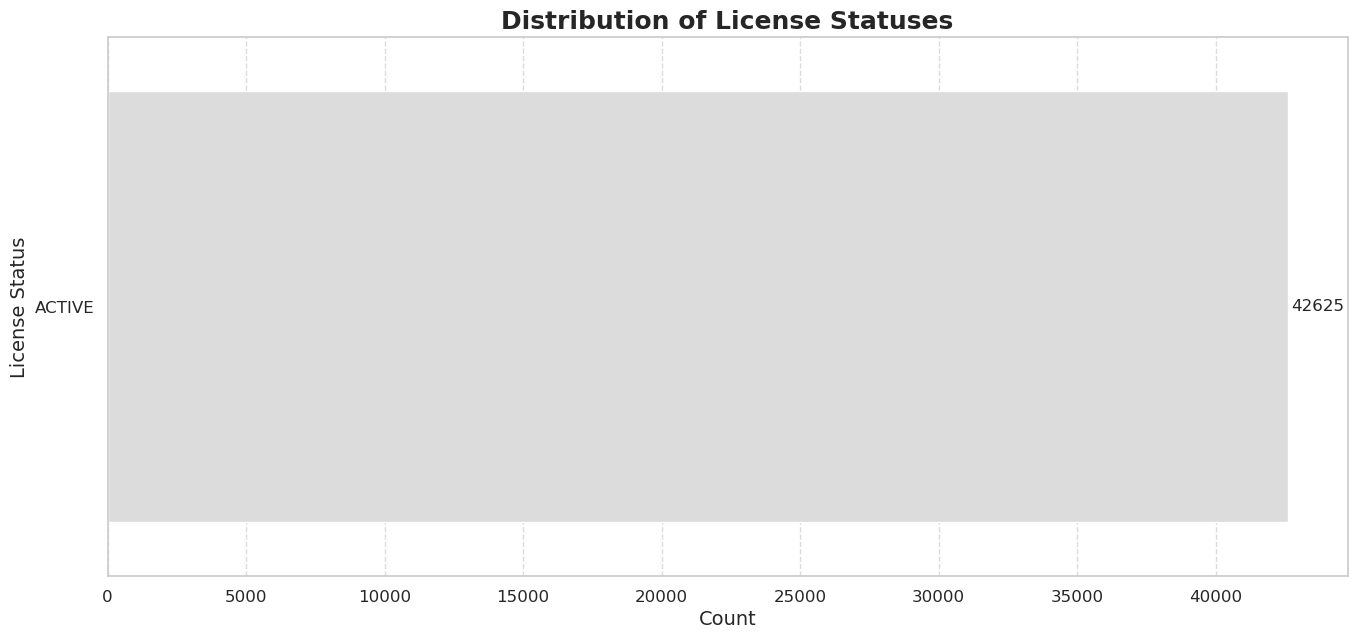

In [187]:
# Sort by count
license_status_counts = license_df['LICENSESTATUS'].value_counts().sort_values(ascending=False)

# Adjust figure size
plt.figure(figsize=(16, 7))

# Create horizontal bar plot for better readability
sns.barplot(y=license_status_counts.index, x=license_status_counts.values, palette='coolwarm')

# Add title and labels
plt.title('Distribution of License Statuses', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('License Status', fontsize=14)

# Show value labels on bars
for index, value in enumerate(license_status_counts.values):
    plt.text(value + 100, index, str(value), fontsize=12, verticalalignment='center')

# Improve readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


#### **Step 2: Define the Filtering Criteria**  

**Justification:**  
For this analysis, only ACTIVE elevators are considered relevant since they represent operational elevators. Other statuses, such as EXPIRED, CANCELLED_NOT_RENEWED, and TERMINATED, represent elevators no longer in service.

In [188]:
# Define the filtering criteria: retain only 'ACTIVE' licenses
relevant_status = ['ACTIVE']

# Filter the dataframe
filtered_license_df = license_df[license_df['LICENSESTATUS'].isin(relevant_status)].copy()

# Verify the filtering
print("LICENSESTATUS after filtering:")
print(filtered_license_df['LICENSESTATUS'].unique())
print(f"Number of records after filtering: {filtered_license_df.shape[0]}")

LICENSESTATUS after filtering:
['ACTIVE']
Number of records after filtering: 42625


#### **Step 3: Handle Missing or Inconsistent Data (Optional)**

If missing values are present in LICENSESTATUS (not the case here), handle them appropriately:

In [189]:
# Check for missing values in LICENSESTATUS
missing_status_count = license_df['LICENSESTATUS'].isnull().sum()
print(f"Number of missing LICENSESTATUS values: {missing_status_count}")

# If there are missing values, decide on handling strategy
if missing_status_count > 0:
    # Option 1: Drop rows with missing LICENSESTATUS
    # filtered_license_df = filtered_license_df.dropna(subset=['LICENSESTATUS'])
    
    # Option 2: Fill missing values with 'Unknown'
    # filtered_license_df['LICENSESTATUS'].fillna('Unknown', inplace=True)
    
    print("Handled missing LICENSESTATUS values.")
else:
    print("No missing LICENSESTATUS values to handle.")

# Decide on 'ACTIVE' only (justification: focus on currently operational elevators)
license_df = license_df[license_df['LICENSESTATUS'] == 'ACTIVE']

Number of missing LICENSESTATUS values: 0
No missing LICENSESTATUS values to handle.


#### **Step 4: Summarize and Visualize the Filtered Data**



In [190]:
# Summarizing the filtering process
total_rows_before = license_df.shape[0]
total_rows_after = filtered_license_df.shape[0]
rows_filtered_out = total_rows_before - total_rows_after

print(f"Total rows before filtering: {total_rows_before}")
print(f"Total rows after filtering: {total_rows_after}")
print(f"Rows filtered out: {rows_filtered_out}")


Total rows before filtering: 42625
Total rows after filtering: 42625
Rows filtered out: 0


**Visualize LICENSESTATUS Distribution (Optional):**

Visualize the distribution of LICENSESTATUS values before and after filtering for additional insights.

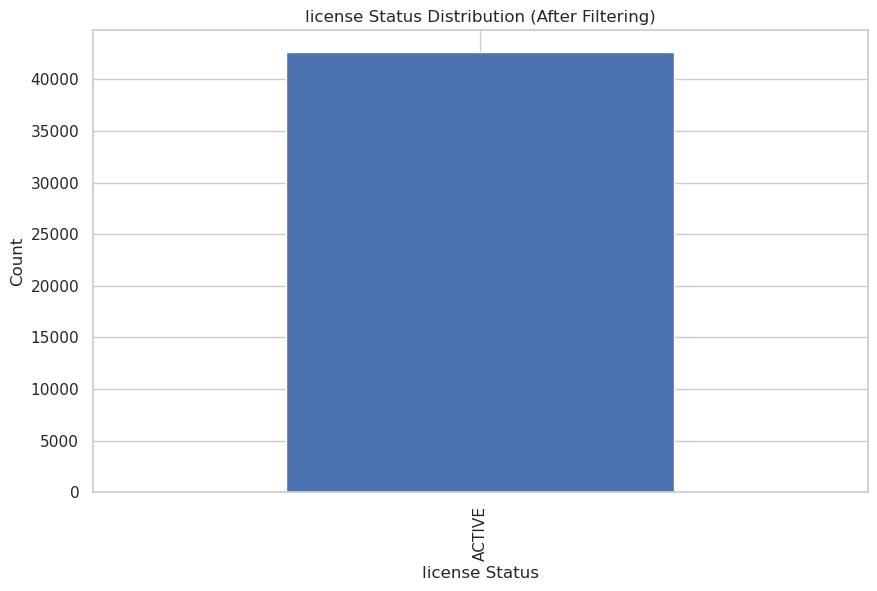

In [191]:


# Visualize LICENSESTATUS distribution after filtering
filtered_status_counts = filtered_license_df['LICENSESTATUS'].value_counts()
filtered_status_counts.plot(kind='bar', figsize=(10, 6), title='license Status Distribution (After Filtering)')
plt.xlabel('license Status')
plt.ylabel('Count')
plt.show()


## **1d. Verifying Uniqueness**

#### **Objective**  
Confirm if ElevatingDevicesNumber is still unique after we filtered.

#### **Approach for 1d: Verifying Uniqueness**

The goal of this step is to ensure the unique identifier (`ElevatingDevicesNumber`) is still unique after filtering the dataset. This is crucial for maintaining the integrity of subsequent analyses.

1. **Identify the Unique Identifier:**  
   Determine the column that uniquely identifies each elevator (`ElevatingDevicesNumber`).

2. **Check Uniqueness:**  
   Use the `.is_unique` property to confirm if the identifier is unique in the filtered dataset.

3. **Interpret the Results:**  
   - If `True`, the identifier is unique, and no further action is required.  
   - If `False`, investigate and resolve any duplicates by exploring their source and relevance.

Let me know if you need additional details or edits!

In [192]:
# Rechecking uniqueness after filtering
is_unique_after_filter = filtered_license_df[common_identifier].is_unique
print(f"Is '{common_identifier}' unique after filtering? {is_unique_after_filter}")

Is 'ElevatingDevicesNumber' unique after filtering? True


## <a id="1e-time-series-plot-of-license-expiry"></a> **1e. Time Series Plot of license Expiry**

#### **Objective**  
Plot a time series showing the count of LICENSE expirations by month.

#### **Approach**  
1. Convert LICENSEEXPIRYDATE to datetime.  
2. Group the data by year and month.  
3. Plot the counts to visualize trends over time.


LICENSEEXPIRYDATE converted to datetime successfully.
Number of invalid date entries: 0


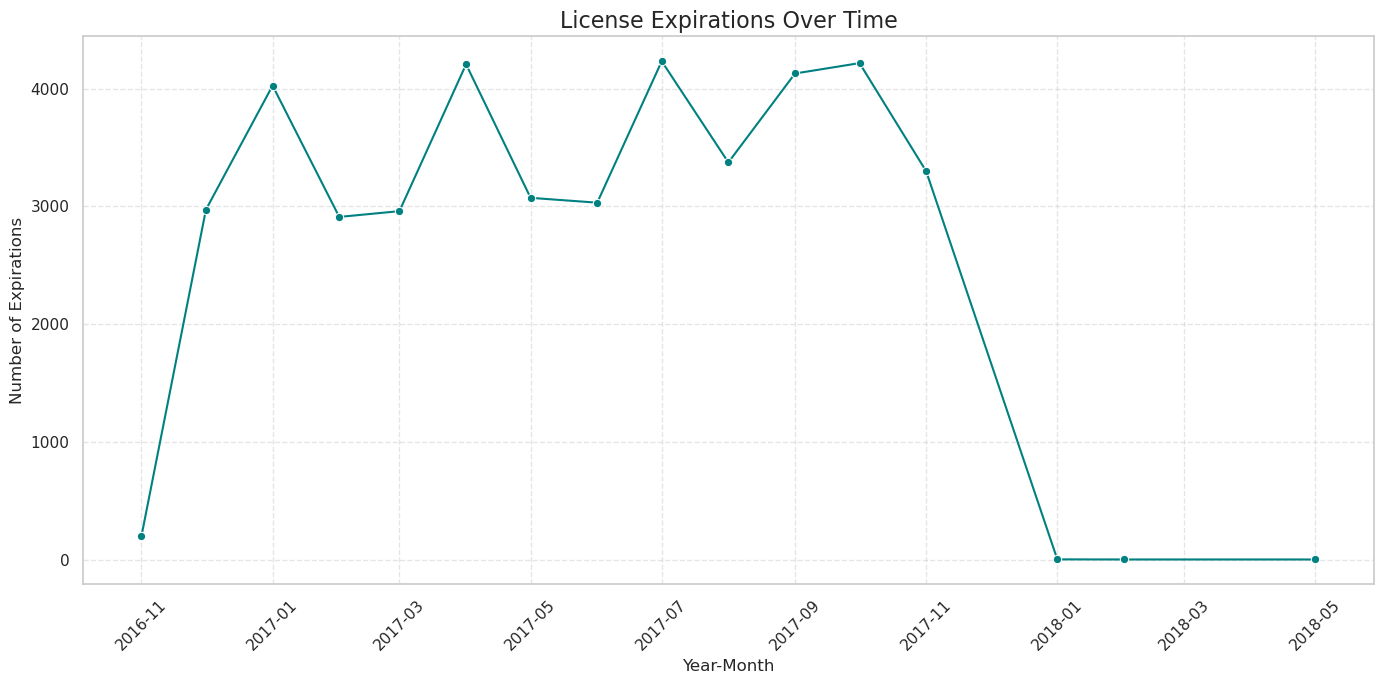

In [193]:
# Convert LICENSEEXPIRYDATE to datetime with specified format
# Assuming the format is 'dd-MMM-yy' (e.g., '28-Apr-17')
license_expiry_format = '%d-%b-%y'

try:
    filtered_license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(filtered_license_df['LICENSEEXPIRYDATE'], format=license_expiry_format)
    print("LICENSEEXPIRYDATE converted to datetime successfully.")
except ValueError as e:
    print(f"Date conversion error: {e}. Attempting to infer formats.")
    filtered_license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(filtered_license_df['LICENSEEXPIRYDATE'], errors='coerce')
    print("Date conversion with inference completed.")

# Check for any NaT values after conversion
nat_count = filtered_license_df['LICENSEEXPIRYDATE'].isnull().sum()
print(f"Number of invalid date entries: {nat_count}")

# Drop rows with invalid dates if any
filtered_license_df.dropna(subset=['LICENSEEXPIRYDATE'], inplace=True)

# Extract month and year for grouping
filtered_license_df['ExpiryMonth'] = filtered_license_df['LICENSEEXPIRYDATE'].dt.month_name()
filtered_license_df['ExpiryYear'] = filtered_license_df['LICENSEEXPIRYDATE'].dt.year

# Group by year and month, then count expirations
expiry_counts = filtered_license_df.groupby(['ExpiryYear', 'ExpiryMonth']).size().reset_index(name='Count')

# Create a 'Year-Month' column for sorting
expiry_counts['YearMonth'] = pd.to_datetime(expiry_counts['ExpiryYear'].astype(str) + '-' + expiry_counts['ExpiryMonth'], format='%Y-%B')

# Sort by 'YearMonth'
expiry_counts.sort_values('YearMonth', inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
sns.lineplot(data=expiry_counts, x='YearMonth', y='Count', marker='o', color='teal')
plt.title('License Expirations Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Expirations', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## **1f. Table of Expirations by Year-Month**

#### **Objective**  
Create a table that counts expirations by year and month, with a readable year-month format, and filter for months with more than five expirations.

1. **Create Year-Month Column:** Format dates for aggregation.
2. **Aggregate Data:** Count expirations per year-month.
3. **Filter Based on Threshold:** Retain only records exceeding the specified count.


In [194]:
# Ensure LICENSEEXPIRYDATE is in datetime format
license_df['LICENSEEXPIRYDATE'] = pd.to_datetime(license_df['LICENSEEXPIRYDATE'])

# Create the Expiry_YearMonth column
license_df['Expiry_YearMonth'] = license_df['LICENSEEXPIRYDATE'].dt.to_period('M').astype(str)

# Counting expirations by year and month
expiry_table = license_df.groupby('Expiry_YearMonth').size().reset_index(name='Count')

# Filtering for counts > 5
expiry_table = expiry_table[expiry_table['Count'] > 5]

# Creating a readable 'Year-Month' format (e.g., January 2015)
expiry_table['Year-Month'] = pd.to_datetime(expiry_table['Expiry_YearMonth']).dt.strftime('%B %Y')

# Selecting relevant columns
expiry_table = expiry_table[['Expiry_YearMonth', 'Count', 'Year-Month']]

# Displaying the table
print("License Expirations by Year-Month (Count > 5):")
display(expiry_table)

# Create the 'Expiry_YearMonth' column in 'YYYY-MM' format
filtered_license_df['Expiry_YearMonth'] = filtered_license_df['LICENSEEXPIRYDATE'].dt.to_period('M').astype(str)

# Counting expirations by year and month
expiry_table = filtered_license_df.groupby('Expiry_YearMonth').size().reset_index(name='Count')

# Filtering for counts > 5
expiry_table = expiry_table[expiry_table['Count'] > 5]

# Creating a readable 'Year-Month' format (e.g., January 2015)
expiry_table['Year-Month'] = pd.to_datetime(expiry_table['Expiry_YearMonth']).dt.strftime('%B %Y')

# Selecting and ordering relevant columns
expiry_table = expiry_table[['Expiry_YearMonth', 'Count', 'Year-Month']]

# Displaying the table
print("License Expirations by Year-Month (Count > 5):")
display(expiry_table)


License Expirations by Year-Month (Count > 5):


,Expiry_YearMonth,Count,Year-Month
0,2016-11,199,November 2016
1,2016-12,2972,December 2016
2,2017-01,4025,January 2017
3,2017-02,2910,February 2017
4,2017-03,2959,March 2017
5,2017-04,4206,April 2017
6,2017-05,3072,May 2017
7,2017-06,3031,June 2017
8,2017-07,4232,July 2017
9,2017-08,3373,August 2017


License Expirations by Year-Month (Count > 5):


,Expiry_YearMonth,Count,Year-Month
0,2016-11,199,November 2016
1,2016-12,2972,December 2016
2,2017-01,4025,January 2017
3,2017-02,2910,February 2017
4,2017-03,2959,March 2017
5,2017-04,4206,April 2017
6,2017-05,3072,May 2017
7,2017-06,3031,June 2017
8,2017-07,4232,July 2017
9,2017-08,3373,August 2017


**Notes:**
- The strftime('%B %Y') formats the period to a more readable form, like "April 2017".  
- We can adjust the threshold (> 5) based on our  data distribution and analysis needs.  

In [195]:
# Save the cleaned and filtered license data to a CSV file
output_file = '../data/processed/cleaned_license_data.csv'
filtered_license_df.to_csv(output_file, index=False)
print(f"Cleaned license data saved to '{output_file}'.")

Cleaned license data saved to '../data/processed/cleaned_license_data.csv'.
